In [1]:
'''Две категории данных из файла Volgmed_2013.xls (конкретные категории и данные выбрать в соответствии с вариантом) подвергнуть А/В тестированию:
сравнить количество пропусков данных на основании точного теста Фишера;
очистить от выбросов и пропусков и сравнить с помощью t-теста Уэлча;
сравнить очищенные от выбросов и пропусков категории с помощью U-теста Манна—Уитни.
Для каждого теста сформулировать, в какую сторону отличаются категории и с каким пи-значением.
Вывести графики гистограмм и эмпирических функций распределения очищенных данных по категориям.'''

# Вариант 4. Окружность грудной клетки на вдохе юношей / девушек первого курса.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
col_sex = 'Пол'
col_chest_circumference = 'Окружность грудной клетки на вдохе, см'

df = pd.read_excel('Volgmed_2013.xlsx', skiprows=1)
df = df[df['Курс'] == 1]
df = df.reset_index(drop=True)

# Убираем точки в "муж." и "жен."
df.loc[:, col_sex] = df.loc[:, col_sex].str.replace(r'\.', '', regex=True)

data = df[[col_sex, col_chest_circumference]]

print(data.value_counts(col_sex))
data

Пол
жен    766
муж    281
Name: count, dtype: int64


,Пол,"Окружность грудной клетки на вдохе, см"
0,жен,95
1,жен,91
2,жен,89
3,жен,88
4,жен,85
...,...,...
1045,муж,94
1046,муж,92
1047,муж,90
1048,муж,94


In [3]:
chest_na = data[col_chest_circumference].isna().map({True: "na", False: "notna"})
crosstab_result = pd.crosstab(chest_na, data[col_sex])

crosstab_result

Пол,жен,муж
"Окружность грудной клетки на вдохе, см",,
na,15,9
notna,751,272


Сравнение количества пропусков данных на основании точного теста Фишера

In [4]:
statistic_fischer, p_value_fischer = stats.fisher_exact(crosstab_result)
print(f'Статистика: {statistic_fischer}\nP-value: {p_value_fischer}')

Статистика: 0.6036395916555704
P-value: 0.2464718910628586


Очистка от выбросов и пропусков

In [5]:
data = data[~data[col_chest_circumference].isna()]

mean = data[col_chest_circumference].mean()
std = data[col_chest_circumference].std()
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std
data = data[(data[col_chest_circumference] > lower_bound) & (data[col_chest_circumference] < upper_bound)]

data

,Пол,"Окружность грудной клетки на вдохе, см"
0,жен,95
1,жен,91
2,жен,89
3,жен,88
4,жен,85
...,...,...
1045,муж,94
1046,муж,92
1047,муж,90
1048,муж,94


In [6]:
data_female = data[data[col_sex] == 'жен'][col_chest_circumference].reset_index(drop=True).astype("float")
data_male = data[data[col_sex] == 'муж'][col_chest_circumference].reset_index(drop=True).astype("float")

Тест Уэлча

In [7]:
statistic_welch, p_value_welch = stats.ttest_ind(data_female, data_male, equal_var=False)
print(f'Статистика: {statistic_welch}\nP-value: {p_value_welch}')

Статистика: -20.578036763967113
P-value: 3.987782496225936e-67


U-тест Манна-Уитни

In [8]:
statistic_mannwhitney, p_value_mannwhitneyu = stats.mannwhitneyu(data_female, data_male)
print(f'Статистика: {statistic_mannwhitney}\nP-value: {p_value_mannwhitneyu}')

Статистика: 27529.0
P-value: 2.5298678003188156e-61


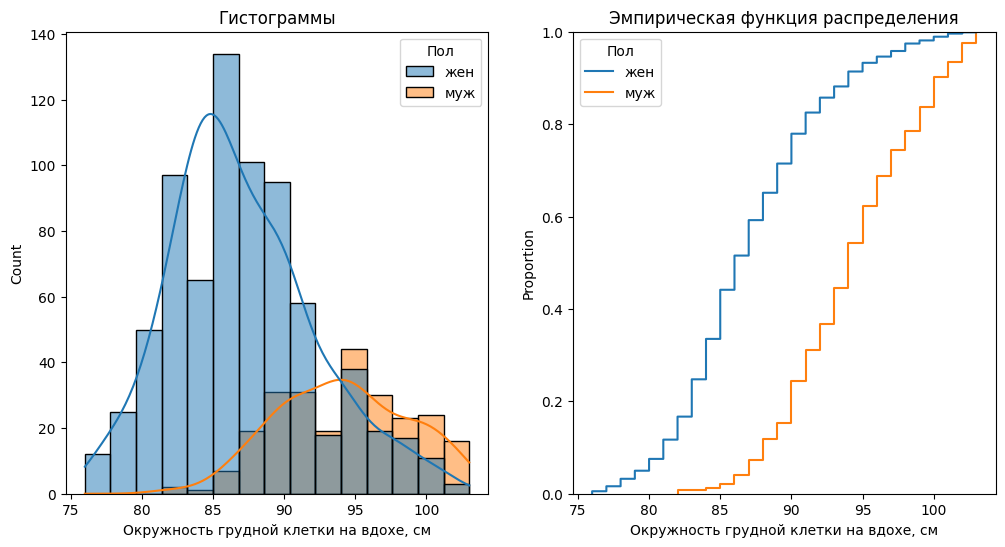

In [9]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data, x=col_chest_circumference, hue="Пол", kde=True).set_title("Гистограммы")

plt.subplot(1, 2, 2)
sns.ecdfplot(data=data, x=col_chest_circumference, hue="Пол").set_title("Эмпирическая функция распределения")

plt.show()